# Import libraries

In [196]:
''' Import libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import re
import nltk
import string

from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.summarization.textcleaner import split_sentences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE

from textblob import TextBlob, Word, Blobber
# to install textblob in your conda packages:
# 1. go to anaconda prompt
# 2. cd Anaconda3>Scripts>conda install -c conda-forge textblob
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import the dataframe contained reviews "boutique_review" from web scraping notebook  to start analysing

In [186]:
#import the final boutique_review dataframe from the web scraping notebooke:
import pickle

with open('boutique_reviews.pickle','rb') as f_read:
    boutique_reviews = pickle.load(f_read)

#set wider columns to check the reviews:
pd.options.display.max_colwidth = 500  

#delete unnecessary columns like review_counts:
del boutique_reviews['review_counts']

boutique_reviews.head()

,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings
0,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,Oh my goodness im so in lovewith the dress that I received from kisha studio today. I ordered a black dress that I saw on Instagram on Tuesday the 21st of April it arrived at my mailbox in 4 days. How awesome is that. I really wanted this dress so I asked about it how would it fit because I'm a short chick and yeah that's my problem. But she insured me that it will be okay so I said yes please i want it.. I gave her my cc info thru direct message thru instatram and boom i hit a tracking n...,2020-04-26,5 star rating
1,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"I love Kisha! I always find something I need and want there. Kisha is so helpful and awesome. She always gives great fashion tips, which I need!Price is right and stuff is super cute. Great customer service too. Shop local!",2019-12-15,5 star rating
2,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,This shop has the most adorable selection of clothes and they were having a 4th of July sale where everything was 15% off. They had quite a few prints that were appealing and prices were very reasonable. The owner is very friendly and sweet as well.,2017-07-07,5 star rating
3,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"I've been shopping here for two years now, and I will definitely continue to shop here for unique and fashionable clothes. I've gotten compliments on everything I've worn here. I'm actually wearing a shirt I've gotten at Kisha right now!I've gotten to know Cindy, the owner, and she's the most lovely person you can ever meet. She always has a big smile when my roommates and I enter the shop, and she already knows exactly what our tastes in clothing are. Once we start browsing, she already...",2015-07-20,5 star rating
4,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"LOVE LOVE LOVE Kisha Studio! Cindy is awesome and has the magic power to find you the perfect piece regardless of your needs. My friend who lives in LA even told me to bring her here on her next visit.Here's a very recent example. I went in over the weekend looking last minute for a dress to wear to a wedding. Cindy grabbed two maxi dresses for me to try on. Now I'm 5'3"" aka short and never wear maxi dresses. But both dresses fitted perfectly and looked so good on me that I seriously thought...",2017-09-26,5 star rating


In [551]:
with open('boutique_info.pickle','rb') as f_read:
    boutique_info = pickle.load(f_read)
    
pd.options.display.max_colwidth = 200 
boutique_info.head()

,boutique_name,rating,number_reviews,price_range,phone_number,address,url_address
0,Kisha Studio Fashion Boutique,5 star rating,120,$$,(415) 422-0468,210 Clement St,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques
1,Morning Lavender,4 star rating,28,$$,(650) 797-0686,1846 Union St,https://www.yelp.com/biz/morning-lavender-san-francisco-2?osq=Clothing+Boutiques
2,Onyx,4.5 star rating,17,$$,(415) 431-6699,289 Divisadero St,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques
3,Wild Feather,5 star rating,29,$$$,(415) 786-2614,597 Haight St,https://www.yelp.com/biz/wild-feather-san-francisco?osq=Clothing+Boutiques
4,Asmbly Hall - formerly on Fillmore Street,4.5 star rating,26,$$,(415) 801-5862,624 Divisadero St,https://www.yelp.com/biz/asmbly-hall-formerly-on-fillmore-street-san-francisco?osq=Clothing+Boutiques


# NLP Analyze for a specific boutique name

### 1. create a subset dataframe for the specific boutique

In [82]:
#create a dataframe contained all reviews for one or a list of boutiques "subset_df"
def subset_df(boutique_name):
    unique_df = boutique_reviews[boutique_reviews.boutique_names == boutique_name]
    return  unique_df

In [187]:
Onyx_df = subset_df("Onyx")
Onyx_df

,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings
148,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"The most magical store full of so many beautiful things. A ton of my favorite things are from Onyx. I constantly get compliments on the Molly M Designs wallet that I bought there. The owners are also super nice and helpful, it's always a treat to shop there.",2020-04-02,5 star rating
149,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Onyx is literally a gem on Divis!Quite a gem +'s:+ Fetching collection for both women and men! The clothing designs reflect someone who understands style without being terribly trendy. Quality of materials show that consumers don't want something from Forever 21.+ Jewelry counter is a gem in itself. Don't forget to browse. Very interesting designs that are unique and worth a look or try.+ Pleasant assistance and someone who has an eye! Don't have her name, but that day, the woman at Onyx mad...",2019-01-01,4 star rating
150,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Just had the same experience as Jessie described. This place seemed to be a total gem and I was loving everything until realizing the shop owner was blatantly ignoring me and my boyfriend, with only us 2 in the shop. I never write reviews but I could not believe how rude this woman was. We spent a good amount of time browsing. When I finally approached the counter to look at jewelry and pick up a card I'm thinking ok now she'll at least acknowledge me.She finally dares to acknowledge my exis...",2017-09-10,1 star rating
151,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Onyx is a beautiful boutique! My wife & love it ! It is filled with art (which rotates), clothing and jewelry. Many of the items are from hard to find designers. The owner, Barb, is just fabulous and friendly (as is her dog, Spike). It's a great addition to the neighborhood! Stop by for unique clothing and gifts.",2018-09-03,5 star rating
152,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"A well curated, bright open boutique in the Mission.I wanted to slip into every dress in there! The fabrics are incredible. Some of the softest, lightest, and well made pieces.It is clear every item is picked out for a reason. I was so smitten with each and every cut, pleat, seam and silhouette. They had a particular dress on a mannequin I kept coming back to because I KNEW no matter who put it on it was going to hang beautifully and flatter every curve. I walked back to it about a dozen tim...",2017-07-23,5 star rating
153,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"I live in the neighborhood and love this boutique as well as the ladies who run it. It has a lovely selection with a great variety of prices and styles. Quality clothes, shoes, jewelry and a small selection of skincare products. Buy small, buy local!Thanks Onyx!",2017-03-06,5 star rating
154,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"Exquisite designers from San Francisco and around the world. The two owners, Shannon and Barb, have an incredible eye for clothing and accessories- love these women! Subtle aroma from a ""Bir Sur"" scented candle and classic rock on vinyl welcome you at the door. You won't be able to leave without your arms weighted down from new styles and gems!",2018-09-05,5 star rating
155,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,"From the same owners of Onyx in the Mission - comes a new Onyx location - conveniently located on boutique lined Divisadero.Onyx Boutique is full of well chosen garments and accessories. From hip Obey faux red leather jackets lined with casual grey hoodie material, to plush lined casual jackets that make you yearn to never take them off - it is brimming with stylish finds. The space is big and 

### 2. Apply text cleaning and stop-words removal to clean each review

In [147]:
def clean_review(text):
    """
    This function cleans a block of text by applying: text_cleaning and remove_stopwords.
    Input:text = the text to be cleaned.
    Output: the text stripped of punctuation and made lowercase, with no stopwords.
    """
    # u'\xa0' represents a non-breaking space in the text block that needs to be removed.
    text = text.replace(u'\xa0', u' ')

    #remove multiple fullstops and make a single fullstop
    text = re.sub('\.+', '. ', text)

    #remove multiple spaces and make a single space.
    text = re.sub(' +', ' ', text)

    #remove all tokens that are not alphabetic
    text = re.sub(r'\d+', '', text)

    #normalization
    text = text.lower()

    #Define punctuations according to nltk corpus.
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~.+'''

    #remove punctuations, traverse the given string and if any punctuation marks occur replace it with null 
    for i in text: 
        if i in punctuations: 
            text = text.replace(i, "") 
 

    tokens = word_tokenize(text)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    #return the cleaned text in a sentence format.
    return ' '.join([''.join(token) for token in tokens])    

In [151]:
#clean the subset_df, subset_df_clean:
def subset_df_cleaned(boutique_name):
    unique_df = boutique_reviews[boutique_reviews.boutique_names == boutique_name]
    for review in unique_df["reviews"]:       
        unique_df.replace(review, clean_review(review), inplace=True)
    return unique_df

In [152]:
Onyx_df_cleaned = subset_df_cleaned("Onyx")
Onyx_df_cleaned

C:\Users\farnaz\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings
148,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,magical store full many beautiful things ton favorite things onyx constantly get compliments molly designs wallet bought owners also super nice helpful always treat shop,2020-04-02,5 star rating
149,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,onyx literally gem divisquite gem fetching collection women men clothing designs reflect someone understands style without terribly trendy quality materials show consumers dont want something forever jewelry counter gem dont forget browse interesting designs unique worth look try pleasant assistance someone eye dont name day woman onyx made remarks couple styles bf tried agreed silently background former fashion assistant editor know someone straight lying trying get sale woman knew going ma...,2019-01-01,4 star rating
150,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,experience jessie described place seemed total gem loving everything realizing shop owner blatantly ignoring boyfriend us shop never write reviews could believe rude woman spent good amount time browsing finally approached counter look jewelry pick card im thinking ok shell least acknowledge finally dares acknowledge existence person cant stand rude smile say hi nothing stare back even peep im like ok clearly wants us go boyfriend first comment wow felt uncomfortable like bothering boom hes ...,2017-09-10,1 star rating
151,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,onyx beautiful boutique wife love filled art rotates clothing jewelry many items hard find designers owner barb fabulous friendly dog spike great addition neighborhood stop unique clothing gifts,2018-09-03,5 star rating
152,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,well curated bright open boutique mission wanted slip every dress fabrics incredible softest lightest well made pieces clear every item picked reason smitten every cut pleat seam silhouette particular dress mannequin kept coming back knew matter put going hang beautifully flatter every curve walked back dozen times study smile many local designers well ones new york one owners attentive knowledgeable dog spike really sweet walked away candle blood orange bergamot yesssstypical prices san fra...,2017-07-23,5 star rating
153,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,live neighborhood love boutique well ladies run lovely selection great variety prices styles quality clothes shoes jewelry small selection skincare products buy small buy localthanks onyx,2017-03-06,5 star rating
154,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,exquisite designers san francisco around world two owners shannon barb incredible eye clothing accessories love women subtle aroma bir sur scented candle classic rock vinyl welcome door wont able leave without arms weighted new styles gems,2018-09-05,5 star rating
155,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,owners onyx mission comes new onyx location conveniently located boutique lined divisadero onyx boutique full well chosen garments accessories hip obey faux red leather jackets lined casual grey hoodie material plush lined casual jackets make yearn never take brimming stylish finds space big well laid perfect hosting fun events im excited see wonderful items rotating particularly taken laromatica perfume selection natural entirely transporting one owners store visited evident puts slew care ...,2012-11-13,4 star rating
156,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,boutique san francisco gem clothing shoes jewelry super urban chic owners really fingers pulse cool sf style art gift gallery also love carry crunchy casual spot even wallpaper cool nice friendly lad

### 3. Get the sentiment of each review

In [247]:
#get the sentiment of each reviews in subset_df_clean, subset_sentiment:
def subset_sentiment(subset_df_clean):
    polarity = []
    subjectivity = []
    for review in subset_df_clean["reviews"]:
        polarity.append(TextBlob(review).sentiment.polarity)
        subjectivity.append(TextBlob(review).sentiment.subjectivity)
        
    subset_df_clean['polarity'] = polarity
    subset_df_clean['subjectivity'] = subjectivity
    return subset_df_clean

In [248]:
subset_df_clean = Onyx_df_cleaned
Onyx_df_sentiment = subset_sentiment(subset_df_clean)
Onyx_df_sentiment

,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings,polarity,subjectivity
148,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,magical store full many beautiful things ton favorite things onyx constantly get compliments molly designs wallet bought owners also super nice helpful always treat shop,2020-04-02,5 star rating,0.454167,0.756250
149,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,onyx literally gem divisquite gem fetching collection women men clothing designs reflect someone understands style without terribly trendy quality materials show consumers dont want something forever jewelry counter gem dont forget browse interesting designs unique worth look try pleasant assistance someone eye dont name day woman onyx made remarks couple styles bf tried agreed silently background former fashion assistant editor know someone straight lying trying get sale woman knew going ma...,2019-01-01,4 star rating,0.212652,0.391515
150,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,experience jessie described place seemed total gem loving everything realizing shop owner blatantly ignoring boyfriend us shop never write reviews could believe rude woman spent good amount time browsing finally approached counter look jewelry pick card im thinking ok shell least acknowledge finally dares acknowledge existence person cant stand rude smile say hi nothing stare back even peep im like ok clearly wants us go boyfriend first comment wow felt uncomfortable like bothering boom hes ...,2017-09-10,1 star rating,0.023810,0.582540
151,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,onyx beautiful boutique wife love filled art rotates clothing jewelry many items hard find designers owner barb fabulous friendly dog spike great addition neighborhood stop unique clothing gifts,2018-09-03,5 star rating,0.434259,0.754630
152,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,well curated bright open boutique mission wanted slip every dress fabrics incredible softest lightest well made pieces clear every item picked reason smitten every cut pleat seam silhouette particular dress mannequin kept coming back knew matter put going hang beautifully flatter every curve walked back dozen times study smile many local designers well ones new york one owners attentive knowledgeable dog spike really sweet walked away candle blood orange bergamot yesssstypical prices san fra...,2017-07-23,5 star rating,0.279842,0.499473
153,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,live neighborhood love boutique well ladies run lovely selection great variety prices styles quality clothes shoes jewelry small selection skincare products buy small buy localthanks onyx,2017-03-06,5 star rating,0.239394,0.566667
154,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,exquisite designers san francisco around world two owners shannon barb incredible eye clothing accessories love women subtle aroma bir sur scented candle classic rock vinyl welcome door wont able leave without arms weighted new styles gems,2018-09-05,5 star rating,0.458712,0.643277
155,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,owners onyx mission comes new onyx location conveniently located boutique lined divisadero onyx boutique full well chosen garments accessories hip obey faux red leather jackets lined casual grey hoodie material plush lined casual jackets make yearn never take brimming stylish finds space big well laid perfect hosting fun events im excited see wonderful items rotating particularly taken laromatica perfume selection natural entirely transporting one owners store visited evident puts slew care ...,2012-11-13,4 star rating,0.174242,0.507660
156,Onyx,17,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques,boutique san francisco gem clothi

In [253]:
# def subset_date_polarity(boutique):
#     subset_date_polarity = subset_sentiment(boutique)[["review_dates","polarity"]]
#     return subset_date_polarity

In [257]:
# subset_date_polarity("Onyx")

In [256]:
# Onyx_df_sentiment[["review_dates","polarity"]]

### 4. Display polarity over time for each specific boutique to monitor the customer satisfaction during time

####  we will consider a time period of two years


In [481]:
def review_polarities_by_date(boutique):
        """
        Returns a Pandas DataFrame containing the date and polarity for each review.
        Columns = date, polarity
        """
#         dates = []
#         polarity = []
        

        boutique_df_cleaned = subset_df_cleaned(boutique)
        boutique_df_sentiment = subset_sentiment(boutique_df_cleaned)

        dates = boutique_df_sentiment["review_dates"]
        polarity = boutique_df_sentiment["polarity"]


        data = {"date":dates, "polarity":polarity}
        df = pd.DataFrame(data).sort_values(by=['date'], ascending=False)#.set_index('date')
        
        return df


In [482]:
# display_polarity_over_time(["Onyx"])
w=review_polarities_by_date("Onyx")
w

C:\Users\farnaz\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\farnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\farnaz\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,date,polarity
148,2020-04-02,0.454167
149,2019-01-01,0.212652
154,2018-09-05,0.458712
151,2018-09-03,0.434259
150,2017-09-10,0.023810
152,2017-07-23,0.279842
156,2017-05-24,0.220391
153,2017-03-06,0.239394
161,2016-07-16,0.450000
157,2016-01-25,0.433333


In [374]:
# w.sort_values(by=['date'], inplace=True, ascending=True)
# w.set_index('date', inplace=True)

# w

In [483]:
def polarity_average(df, window=720):
    current_date = df.date.min()
    end_date = df.date.max()
    
    print("current_date: ", current_date)
    print("end_date: ", end_date)
    window_start = current_date - pd.Timedelta(int(window/2), unit ='D')
    window_end = current_date + pd.Timedelta(int(window/2), unit ='D')
    
    print("window_start: ", window_start)
    print("window_end: ", window_end)    
    
    time_delta = pd.Timedelta(30, unit='D') #How often to calculate average
    print("time_delta: ", time_delta)    
    
    d = []
    while current_date < end_date:
        polarity_average = df.polarity[(df.date < window_end) & (df.date > window_start)].mean()
        d.append({'date':current_date,'polarity':polarity_average})
        window_start += time_delta
        window_end   += time_delta
        current_date += time_delta
    return pd.DataFrame(d)

In [484]:
w_polarity = polarity_average(w, window=720 )
w_polarity

current_date:  2012-07-12 00:00:00
end_date:  2020-04-02 00:00:00
window_start:  2011-07-18 00:00:00
window_end:  2013-07-07 00:00:00
time_delta:  30 days 00:00:00


,date,polarity
0,2012-07-12,0.254482
1,2012-08-11,0.254482
2,2012-09-10,0.254482
3,2012-10-10,0.277988
4,2012-11-09,0.283491
...,...,...
90,2019-12-03,0.333409
91,2020-01-02,0.454167
92,2020-02-01,0.454167
93,2020-03-02,0.454167


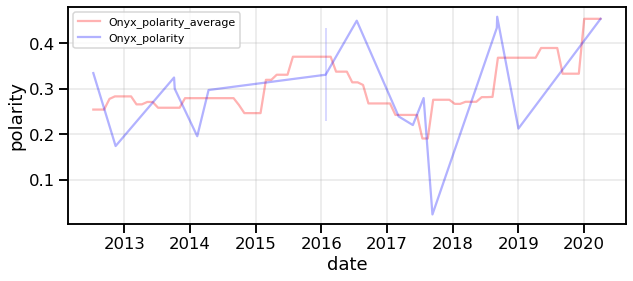

In [494]:
plt.figure(figsize=(10,4))
sns.lineplot( x="date", y="polarity", data= w_polarity, color="red",alpha=0.3,label="Onyx_polarity_average")
sns.lineplot( x="date", y="polarity", data= w, color="blue",alpha=0.3,label="Onyx_polarity")
plt.legend(prop={'size': 11})
plt.grid(alpha=0.3)
plt.show()

In [492]:
def display_polarity_over_time(boutique_list):
    plt.figure(figsize=(20,8))
    for boutique in boutique_list:
        polarity_df = review_polarities_by_date(boutique)
    return polarity_df
#         sns.lineplot( x="date", y="polarity", data= polarity_df, color="blue",alpha=0.3,label=f"{boutique}(polarity)")
#         polarity_average = polarity_average(polarity_df, window=720)
#         sns.lineplot( x="date", y="polarity", data = polarity_average, label=f"{boutique} (average)")
#     plt.grid(alpha=0.3)
#     return plt.show()


In [493]:
display_polarity("Onyx")

UnboundLocalError: local variable 'polarity_average' referenced before assignment

<Figure size 1440x576 with 0 Axes>

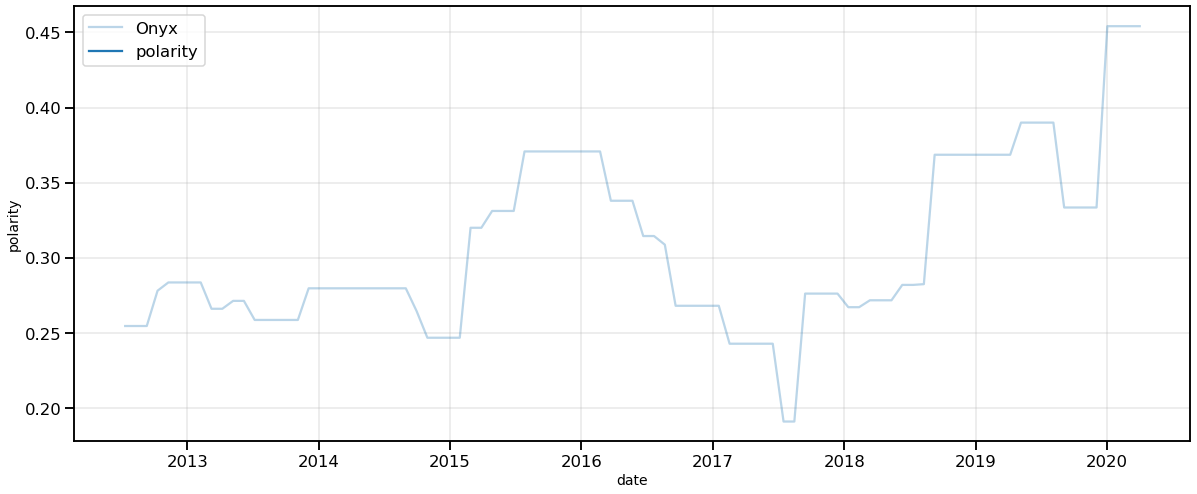

In [415]:
plt.figure(figsize=(20,8))
sns.lineplot(data= w_polarity.set_index("date"), alpha=0.3,label="Onyx")
plt.xlabel("date",fontsize = 14)
plt.ylabel("polarity", fontsize = 14)
plt.grid(alpha=0.3)
plt.show()

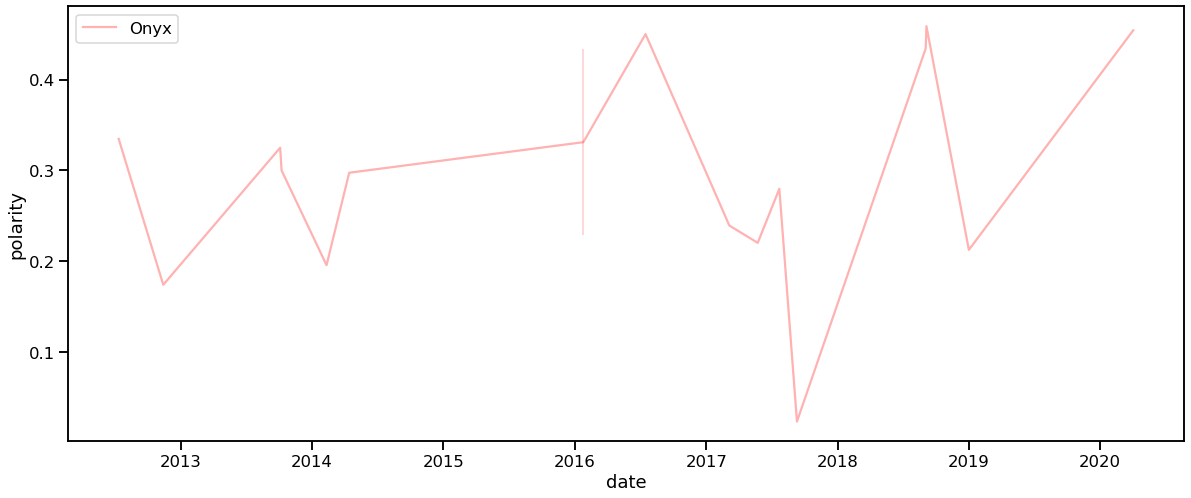

In [449]:
plt.figure(figsize=(20,8))
sns.lineplot( x="date", y="polarity", data= w, color="red",alpha=0.3,label="Onyx")
plt.show()

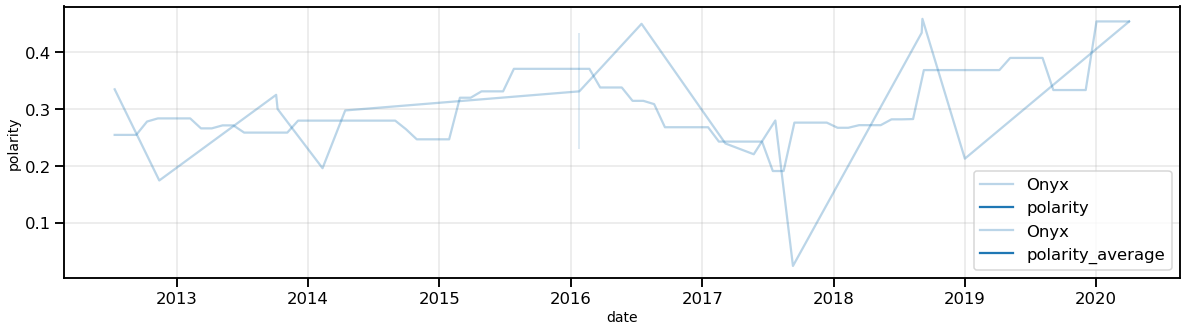

In [437]:
plt.figure(figsize=(20,5))
sns.lineplot(data= w.set_index("date"), color="coral", alpha=0.3,label="Onyx")
sns.lineplot(data= w_polarity.set_index("date"), color="red", alpha=0.3,label="Onyx")
plt.xlabel("date",fontsize = 14)
plt.ylabel("polarity", fontsize = 14)

plt.grid(alpha=0.3)
plt.show()

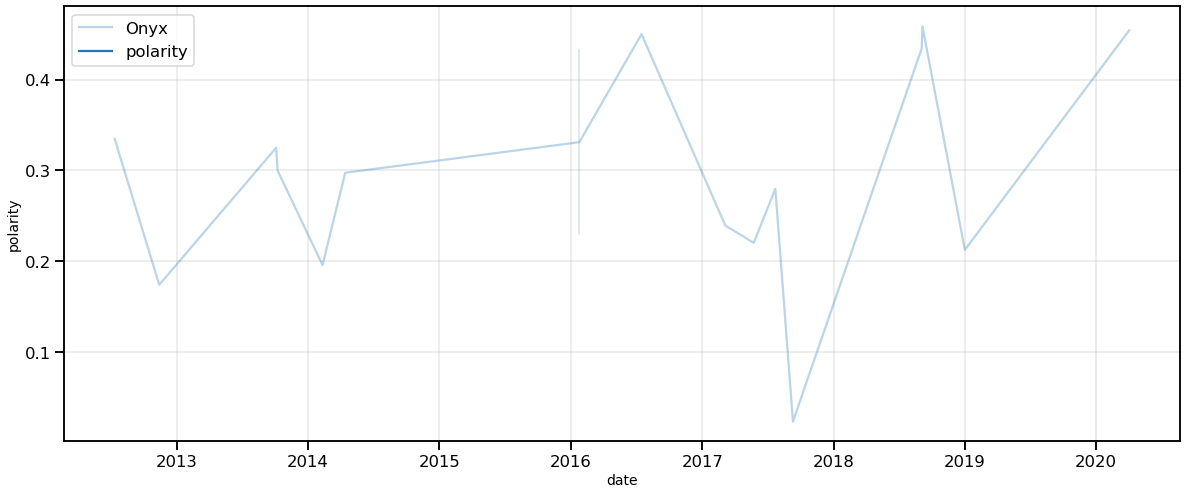

In [318]:
plt.figure(figsize=(20,8))
sns.lineplot(data= w, alpha=0.3,label="Onyx")
plt.xlabel("date",fontsize = 14)
plt.ylabel("polarity", fontsize = 14)
plt.grid(alpha=0.3)